<img src="logo.png" alt="venn" style="width: 400px;"/>

***

<h1><center> Taller Introducción a la Bioinformática - Grupo BioinformaticsGRX</center></h1>
<img src="logobio.jpg" alt="venn" style="width: 700px;"/>

### Día 1:

- Introducción a la bioinformática
- Usos prácticos de la bioinformática, parte 1: Clasificadores

***

# ¿Quién soy?
<img src="bartlogos.jpg" alt="venn" style="width: 700px;"/>

# Bartolomé Ortiz

- Grado en Matemáticas.
- Máster en Fisica y Matemáticas: Especialidad en biomatemáticas.
- Estudiante de doctorado: Ciencias de la computación.
- Investigación libre, abierta e interdisciplinar.
- Charlas, podcast y comunicación científica.

<h2><center> @bortizmath en twitter ;)</center></h2>

***

***

***

# Clasificadores: Una potente herramienta para asistir al médico.

#### Breve introducción de conceptos
- ## Machine Learning 

Es una disciplina científica del ámbito de la Inteligencia Artificial que crea sistemas que aprenden automáticamente; aprender en este contexto quiere decir, identificar tipos de patrones complejos en millones de datos de forma más concreta; Machine Learning se trata de crear programas capaces de generalizar comportamientos a partir de una información no estructurada suministrada en forma de ejemplos.

<img src="venn1.png" alt="venn" style="width: 500px;"/>

- ## Aprendizaje supervisado: 
Se entrena al algoritmo otorgándole las preguntas, denominadas características, y las respuestas, denominadas etiquetas. Esto se hace con la finalidad de que el algoritmo las combine y pueda hacer predicciones.

- ## Aprendizaje no supervisado:
A diferencia del aprendizaje supervisado, en el no supervisado solo se le otorgan las características, sin proporcionarle al algoritmo ninguna etiqueta. Su función es la agrupación, por lo que el algoritmo debería catalogar por similitud y poder crear grupos, sin tener la capacidad de definir cómo es cada individualidad de cada uno de los integrantes del grupo.

<img src="tipos.png" alt="venn" style="width: 700px;"/>

Llegamos por tanto a los __clasificadores__ , uno de los tipos de aprendizaje supervisado.

### Definición :
El término clasificador se utiliza en referencia al algoritmo utilizado para asignar un elemento entrante no etiquetado en una categoría concreta conocida. Dicho algoritmo, permite pues, ordenar o disponer por clases elementos entrantes, a partir de cierta información característica de estos.


![class](disscatter.jpg " class")
***
***
***


# Caso práctico: Clasificación para la predicción de cáncer de mama 

<img src="cancer.jpg" alt="venn" style="width: 300px;"/>

## Objetivo
Obtener un algoritmo de clasificación a partir de los datos que nos permita dar una predicción razonable sobre si las células son o no cancerosas

## Datos
Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen. n el espacio tridimensional es el descrito en: __K. P. Bennett y O. L. Mangasarian: "Discriminación robusta de la programación lineal de dos conjuntos linealmente inseparables", Métodos de optimización y software 1, 1992, 23-34.__

Esta base de datos también está disponible a través del servidor ftp UW CS: ftp _ftp.cs.wisc.edu cd math-prog / cpo-dataset / machine-learn / WDBC/_

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Vamos a por el ordenador

## Lenguaje 
<img src="índice.jpeg" alt="venn" style="width: 300px;"/>

***

## Librerías
<img src="pandas_logo.png" alt="venn" style="width: 300px;"/>
<img src="índice.png" alt="venn" style="width: 200px;"/>
<img src="Scikit_learn.png" alt="venn" style="width: 300px;"/>

***

## Interfaz de trabajo
<img src="Jupyter_logo.png" alt="venn" style="width: 300px;"/>

***


Concepto clave: **Dataframe**.

In [84]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
####################################################
#                                                  #
# Jornadas Nacionales de Estudiantes Biosanitarios #
#                                                  #
####################################################
@author: BioinformaticsGRX
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
# create dataframe (df)
df = pd.read_csv('wdbc.csv')


## Pasos
<img src="steps.png" alt="venn" style="width: 700px;"/>

# Preprocessing

- Comprobamos que nuestro dataset se haya importado correctamente.

- Echamos un vistazo a un resumen rápido de nuestras variables. Para ello ordenes como __info()__,__head() o __describe()__ nos permite visualizar de forma rápida: 
    - Cantidad de casos.
    - Columnas.
    - Tipo de datos.
    - Muestra representativa de como está nuestra tabla.
    - Medias.
    - Varianza.
    - Minimos y máximos.
    - cuartiles.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                        569 non-null int64
diagnosis                 569 non-null object
radius                    569 non-null float64
texture                   569 non-null float64
perimeter                 569 non-null float64
area                      569 non-null float64
smoothness                569 non-null float64
compactness               569 non-null float64
concavity                 569 non-null float64
concave_points            569 non-null float64
symmetry                  569 non-null float64
fracta_dimension          569 non-null float64
radius_se                 569 non-null float64
texture_se                569 non-null float64
perimeter_se              569 non-null float64
area.1                    569 non-null float64
smoothness_se             569 non-null float64
compactness_se            569 non-null float64
concavity_se              569 non-null float64
conca

In [87]:
df.head(5)

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worst,texture_worst,perimeter_worst,area.2,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fracta_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [88]:
#Before taking our analysis any further, let's have a look to our dataset common measures
print(df.describe())

                 ID       radius     texture   perimeter         area  \
count  5.690000e+02   569.000000  569.000000  569.000000   569.000000   
mean   3.037183e+07   706.771388   19.289649   91.969033   654.889104   
std    1.250206e+08  2430.243368    4.301036   24.298981   351.914129   
min    8.670000e+03     7.760000    9.710000   43.790000   143.500000   
25%    8.692180e+05    12.210000   16.170000   75.170000   420.300000   
50%    9.060240e+05    13.850000   18.840000   86.240000   551.100000   
75%    8.813129e+06    17.680000   21.800000  104.100000   782.700000   
max    9.113205e+08  9904.000000   39.280000  188.500000  2501.000000   

       smoothness  compactness   concavity  concave_points    symmetry  \
count  569.000000   569.000000  569.000000      569.000000  569.000000   
mean     4.304801     4.835984    7.489124        2.366459   16.965766   
std     21.074558    26.827478   35.618994       16.155145   53.846023   
min      0.052630     0.019380    0.000000    

In [89]:
# search for missing values
print(df.isnull().sum().sum())

## In case there is some:
df_no_missing = df.dropna() # drop missing observation
#df_cleaned = df.dropna(how='all') # drop rows where all cells are NA
#df.fillna(0) # fill missing data with zeros
#df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True) # fill with the mean 


0


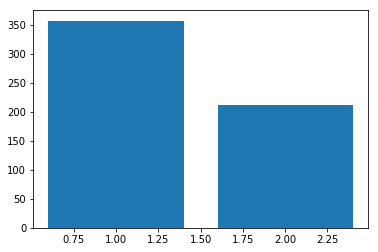

357 212


In [90]:
# malignant vs benignat cases 
mal_cases = df['diagnosis'].value_counts()
plt.bar([1, 2], (mal_cases[0], mal_cases[1]))
plt.show()
print(mal_cases[0], mal_cases[1])

In [91]:
df.corr()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,...,radius_worst,texture_worst,perimeter_worst,area.2,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fracta_dimension_worst
ID,1.000000,0.030443,0.099770,0.073159,0.096893,-0.001194,0.028763,0.032244,-0.020529,0.005717,...,0.031763,0.064720,0.079986,0.107187,0.008598,0.055258,-0.004907,0.114780,0.055548,-0.015432
radius,0.030443,1.000000,-0.099840,-0.386753,-0.319166,0.029797,-0.050406,-0.002002,-0.041176,0.059780,...,0.441559,-0.115969,-0.347007,-0.278298,0.024718,-0.017172,0.005269,-0.012441,-0.036770,-0.036936
texture,0.099770,-0.099840,1.000000,0.329533,0.321086,0.033670,0.140073,0.054148,0.082132,-0.032590,...,-0.041579,0.912045,0.358040,0.343546,-0.005302,0.034215,0.031426,0.059725,-0.064752,0.019585
perimeter,0.073159,-0.386753,0.329533,1.000000,0.986507,0.105892,0.098709,0.155419,0.215696,-0.097831,...,-0.272661,0.303038,0.970387,0.941550,0.000419,0.023235,0.058499,0.185364,0.086627,0.027304
area,0.096893,-0.319166,0.321086,0.986507,1.000000,0.107286,0.076765,0.151664,0.215024,-0.096938,...,-0.216782,0.287489,0.959120,0.959213,-0.002280,0.010010,0.055673,0.183860,0.083427,0.008054
smoothness,-0.001194,0.029797,0.033670,0.105892,0.107286,1.000000,-0.034976,0.014554,0.043158,0.001686,...,0.058773,0.037551,0.125642,0.128621,0.016403,-0.051672,0.026080,0.030205,0.022975,-0.025747
compactness,0.028763,-0.050406,0.140073,0.098709,0.076765,-0.034976,1.000000,0.103352,0.178646,0.006421,...,-0.031806,0.129648,0.125386,0.088754,0.075275,-0.036373,0.063028,0.083746,0.039552,0.192826
concavity,0.032244,-0.002002,0.054148,0.155419,0.151664,0.014554,0.103352,1.000000,0.066535,-0.019557,...,-0.037428,0.051821,0.151919,0.144454,-0.008968,0.030513,0.256058,0.090931,-0.042144,-0.026531
concave_points,-0.020529,-0.041176,0.082132,0.215696,0.215024,0.043158,0.178646,0.066535,1.000000,-0.044912,...,-0.025802,0.052106,0.203744,0.197594,0.072517,-0.036878,-0.032678,0.080438,-0.047359,0.123428
symmetry,0.005717,0.059780,-0.032590,-0.097831,-0.096938,0.001686,0.006421,-0.019557,-0.044912,1.000000,...,0.014727,-0.050247,-0.100861,-0.100657,-0.046680,0.024209,0.083441,0.099551,-0.004926,-0.040480


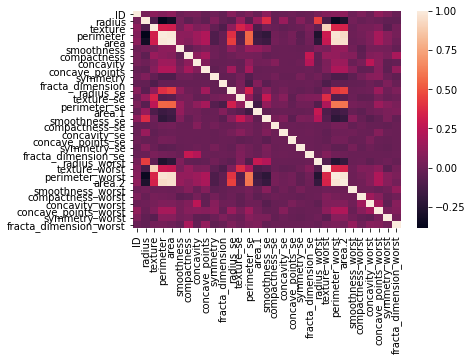

In [92]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

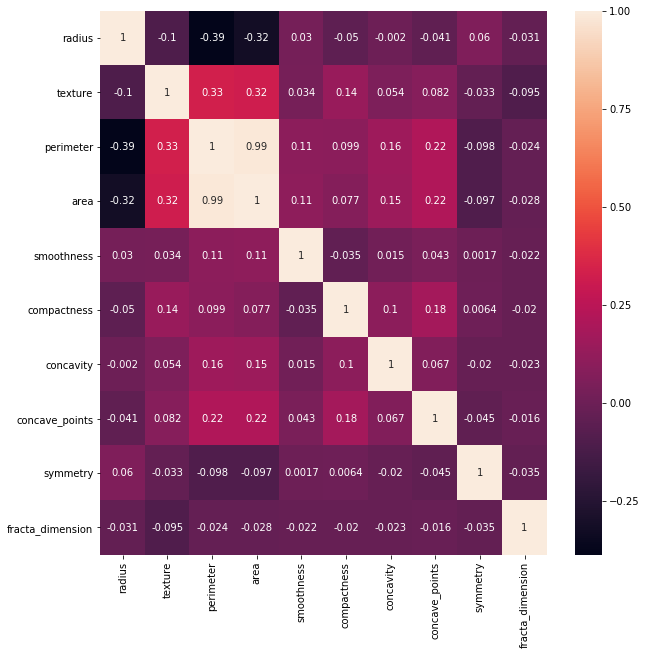

In [93]:
df=df[['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fracta_dimension']]
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

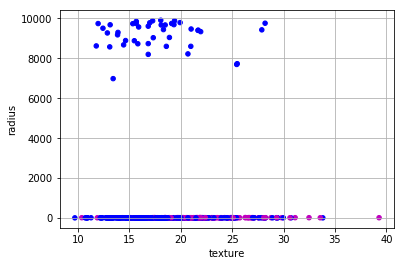

In [94]:
plt.figure(figsize=(10,10))
df.plot(kind='scatter',x='texture', y='radius', c=df['diagnosis'], grid=True)
plt.show()

<Figure size 720x720 with 0 Axes>

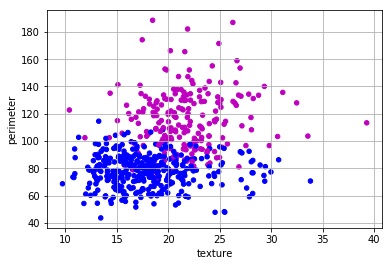

In [95]:
plt.figure(figsize=(10,10))
df.plot(kind='scatter',x='texture', y='perimeter', c=df['diagnosis'], grid=True)
plt.show()

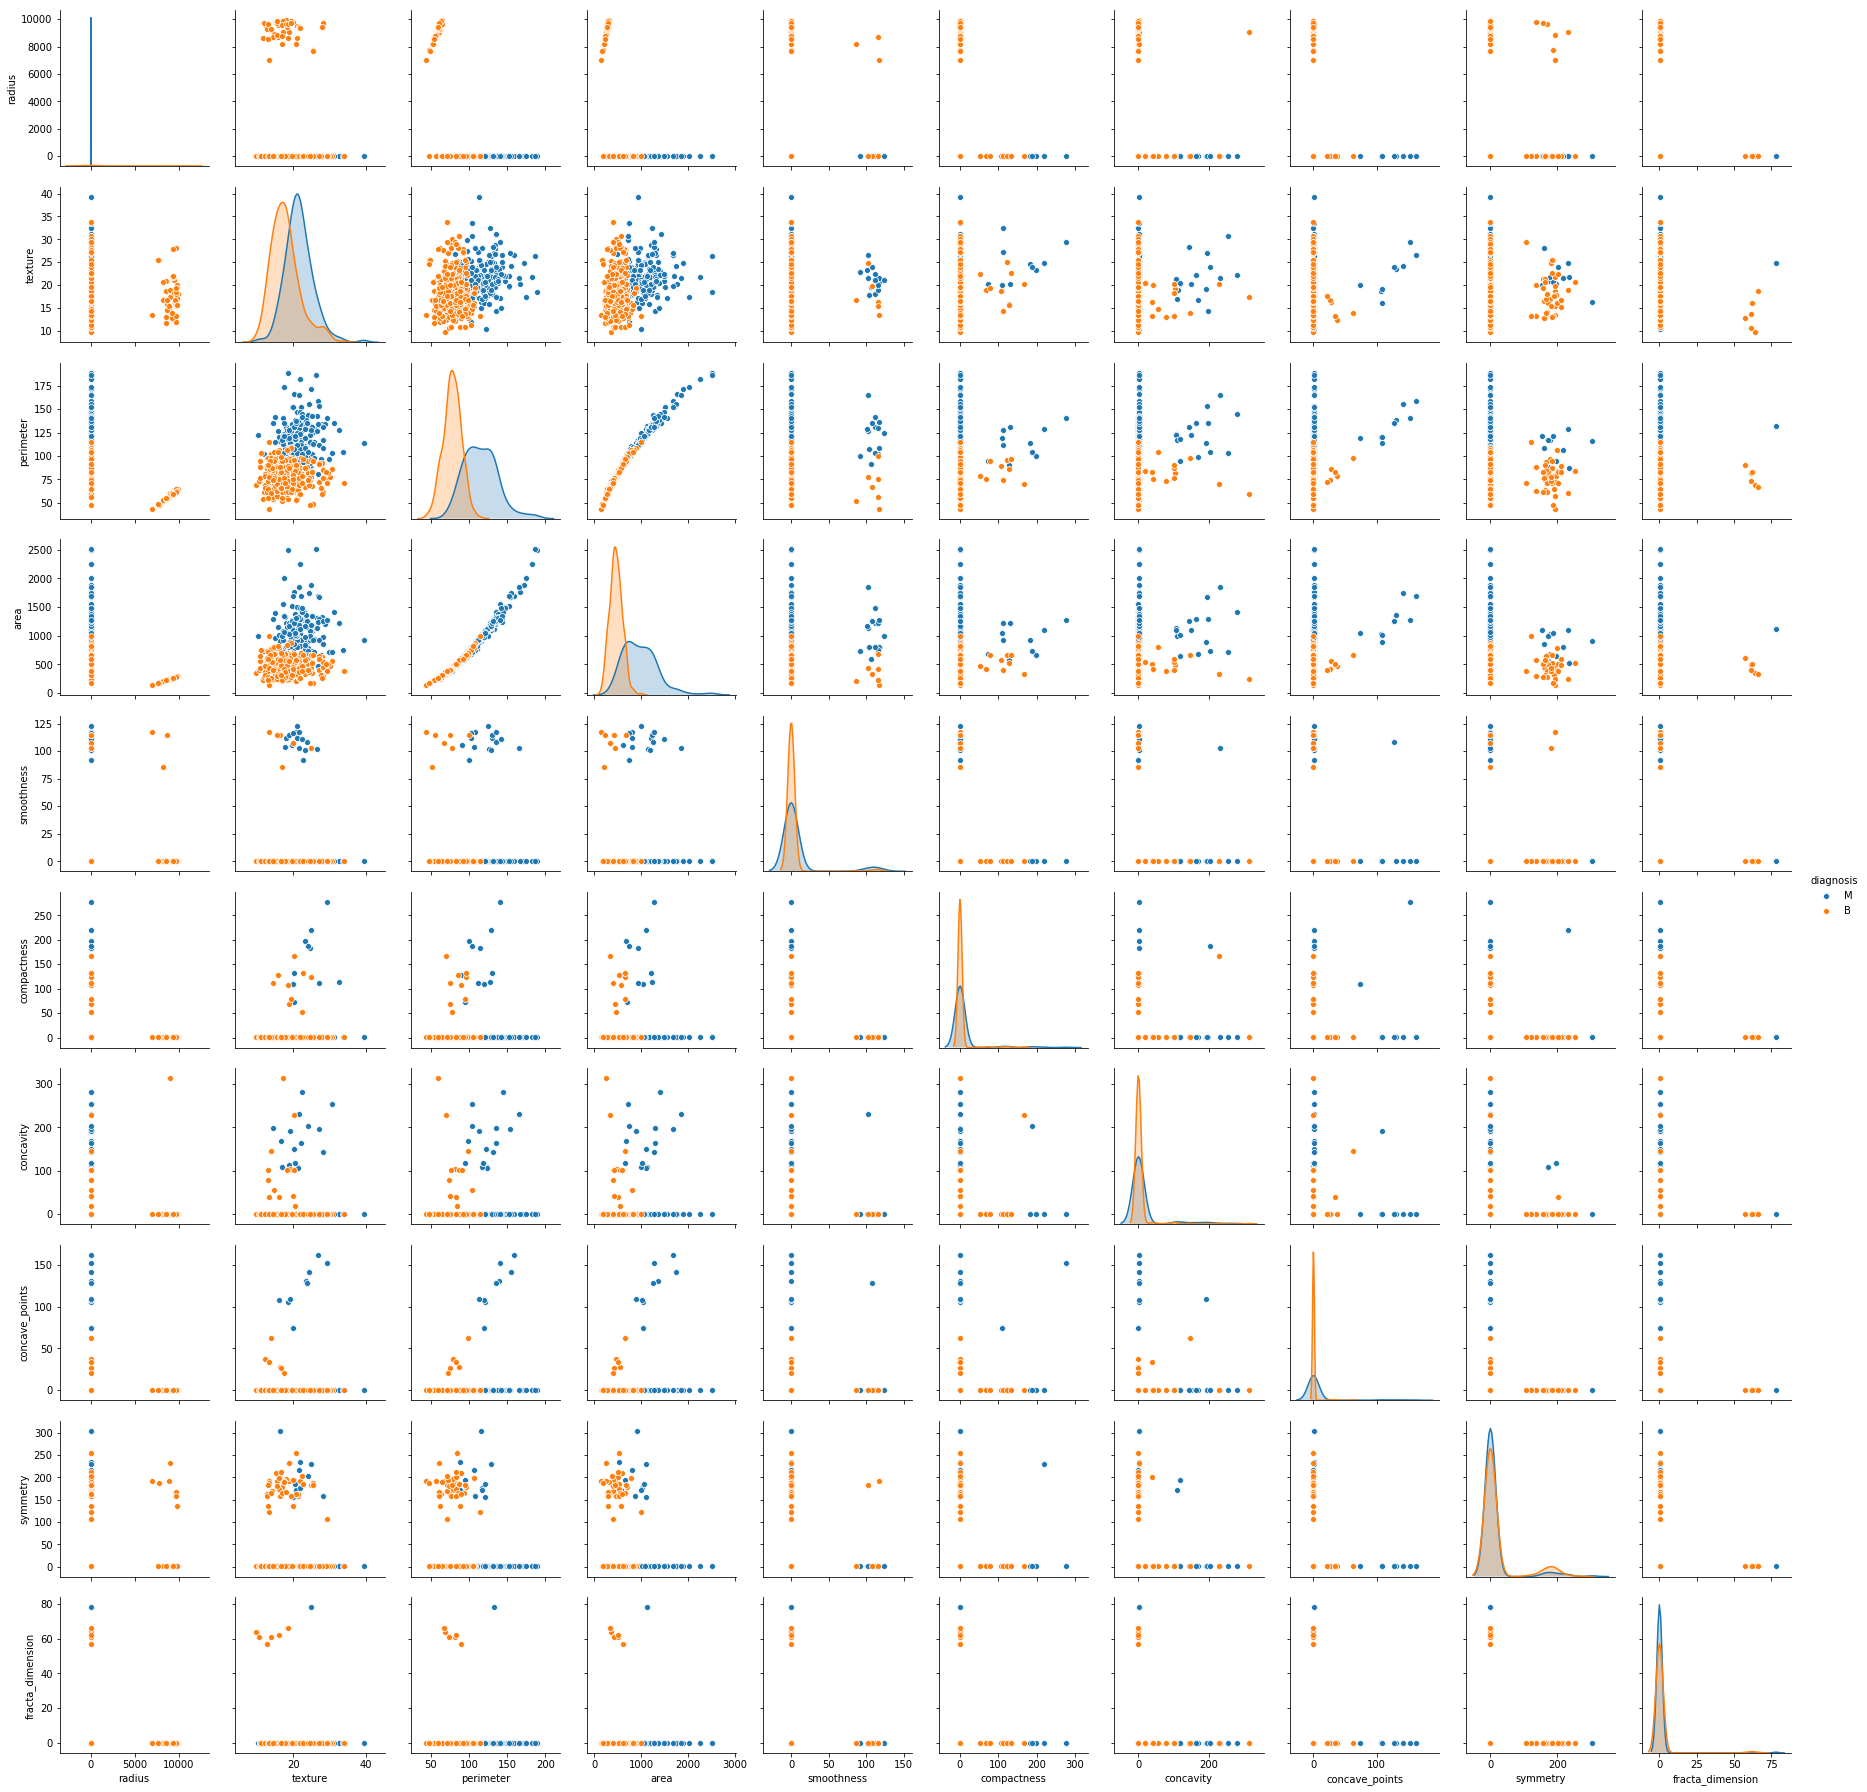

In [96]:

g = sns.pairplot(df[['diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave_points','symmetry','fracta_dimension']], hue="diagnosis")

# Construcción de varios clasificadores

Una vez que tenemos bastante conocimiento sobre nuestro dataset, procedemos a crear clasificadores.

<img src="step.jpg" alt="venn" style="width: 500px;"/>

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time

### Selecionamos características que nos interesan

In [98]:
diag_map = {'M':1, 'B':0}
df['diagnosis'] = df['diagnosis'].map(diag_map)
features_mean= list(df.columns[1:30])


### Dividimos el conjunto dos:
- ### Entrenamiento
- ### Test

In [99]:
X = df.loc[:,features_mean]
y = df.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

# Elegimos el modelo

En nuestro caso, más que elegir, vamos a ver varios, y la filosofía detras de los mismos.


## k-nearest neighbors

<img src="knn.jpg" alt="venn" style="width: 500px;"/>


In [100]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 92.11%
Cross validation score: 88.25% (+/- 7.27%)
Execution time: 0.016973 seconds 



## Naive-Bayes

<img src="nb.png" alt="venn" style="width: 500px;"/>

In [101]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 82.46%
Cross validation score: 77.35% (+/- 14.03%)
Execution time: 0.016623 seconds 



## Decision tree

<img src="dtree.png" alt="venn" style="width: 500px;"/>

In [102]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Dedicion Tree Accuracy: 91.23%
Cross validation score: 89.30% (+/- 6.29%)
Execution time: 0.022431 seconds 



# Análisis de componentes principales 

## ¿Qué es?
En estadística, el análisis de componentes principales (en español ACP, en inglés, PCA) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Técnicamente, el ACP busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. Esta convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes principales. 

In [132]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

x = df.loc[:, features_mean].values
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [133]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

In [134]:
finalDf

,principal component 1,principal component 2,diagnosis
0,0.708348,-1.072263,1
1,2.027117,-0.943098,1
2,2.004591,-0.716683,1
3,-0.701424,-0.105690,1
4,2.636972,0.853942,1
5,-0.766943,-0.384376,1
6,2.977698,3.657336,1
7,-0.042416,-0.244149,1
8,-0.575407,0.716950,1
9,-0.514037,0.736691,1


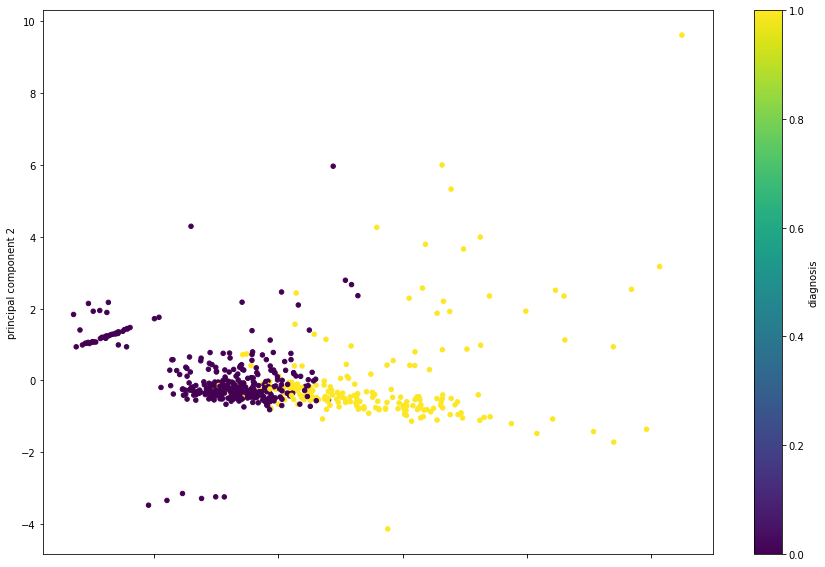

In [135]:
finalDf.plot.scatter(x='principal component 1',y='principal component 2',c='diagnosis', colormap='viridis',figsize=(15,10))

## Repetimos los experimentos con clasificadores 

Vamos a repetir los experimentos con clasificadores. 

Dado que nuestro dataset es pequeño, los cambios no serán muy grandes. No perdáis de vista la "big picture" de todo esto: trabajar cuando tenemos muchisimos datos.

Aún así debéis fijaros en dos cosas: 
- El tiempo de ejecución, aunque breve, disminuye aún más al tener toda la información condensada solo en 2 variables
- La puntuación de nuestros clasificadores baja un poco (puesto que no estamos usando tanta informacion como antes), pero no hay un cambio dramático -> nos hemos quedado con lo importante.

In [108]:
features=['principal component 1','principal component 2']
X = finalDf.loc[:,features]
y = finalDf.loc[:, 'diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

accuracy_all = []
cvs_all = []

Accuracy: 92.11%
Cross validation score: 89.47% (+/- 5.39%)
Execution time: 0.011539 seconds 



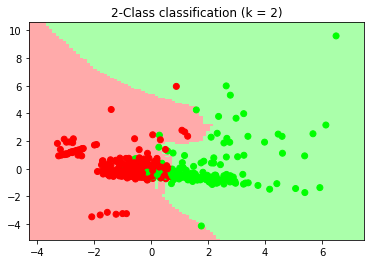

/home/booort/.local/lib/python3.6/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'label'
  s)


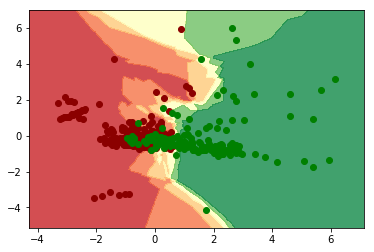

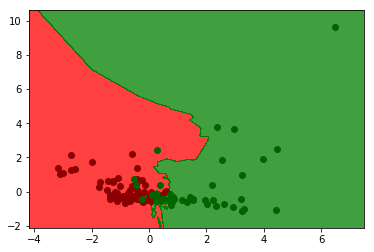

In [131]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



### PLoting 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
h = .12
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (2))
plt.show()

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
#plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            # alpha = 0.75, cmap = ListedColormap(('red', 'green')))
Z = clf.predict_proba(np.c_[X1.ravel(), X2.ravel()])[:, 1]
Z = Z.reshape(X1.shape)
grafico = plt.contourf(X1, X2, Z, cmap= 'RdYlGn', alpha=.8, label='probabilidad')
h1,l1 = grafico.legend_elements("Z")
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.values[y_set == j, 0], X_set.values[y_set == j, 1],
                c = ListedColormap(('darkred', 'green'))(i), label = j)
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set.values[y_set == j, 0], X_set.values[y_set == j, 1],
                c = ListedColormap(('darkred', 'darkgreen'))(i), label = j)

plt.show()

Accuracy: 89.47%
Cross validation score: 85.97% (+/- 9.36%)
Execution time: 0.01052 seconds 



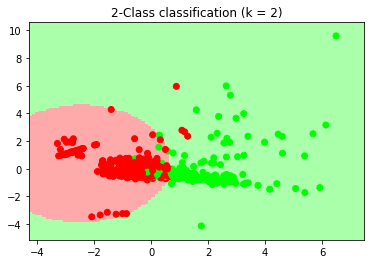

In [110]:
from sklearn.naive_bayes import GaussianNB

start = time.time()

clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))


### PLoting 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
h = .12
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (2))
plt.show()

Dedicion Tree Accuracy: 87.72%
Cross validation score: 86.13% (+/- 6.56%)
Execution time: 0.011106 seconds 



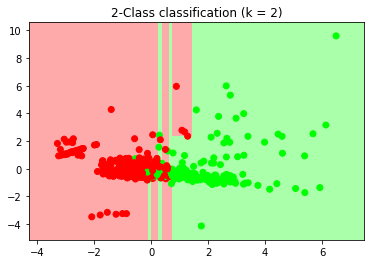

In [111]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Dedicion Tree Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))



### PLoting 
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
h = .12
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)" % (2))
plt.show()


# ¡Y hasta aqui!
## Recordad que esto ha sido un muy muy muy breve paseo por las herramientas que están modelando la medicina del mañana. 
## Estos conocimientos pueden marcar la diferencia y convertiros en profesionales muy valiosos, preparados para saber fusionar desarrollos científicos punteros, siempre desde un punto de vista crítico. 

# Si tenéis más interés seguid a BioinformaticsGRX!

<img src="logobio.jpg" alt="venn" style="width: 700px;"/>

Fuentes, referencias, enlaces, repositorios, etc :

In [ ]:
pandas -v